In [1]:
import qse
import numpy as np

from qiskit.quantum_info import SparsePauliOp

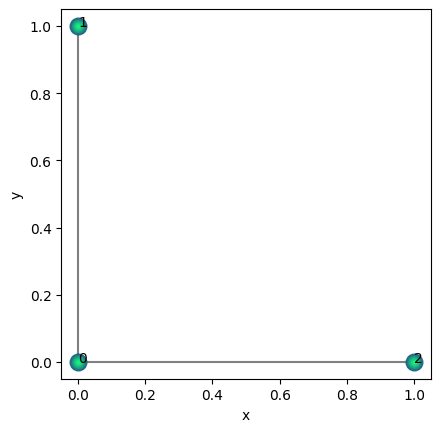

In [2]:
positions = np.array([
    [0., 0., 0.],
    [0., 1., 0.],
    [1., 0., 0.],
    ])

qbits = qse.Qbits(positions=positions)
qbits.draw(show_labels=True, radius="nearest")

In [3]:
def distance_func(distance, tolerance=0.01):
    """
    Simple distance function that only includes nearest neighbours.
    
    This function returns a coefficient of 1.0 if the input distance is approximately 1.0
    (within a specified tolerance), otherwise it returns 0.0.
    """
    if np.abs(distance-1) < tolerance:
        return 1.
    return 0.

In [4]:
# simple ZZ coupling
coupling = qbits.compute_interaction_hamiltonian(distance_func, "Z")

SparsePauliOp([i.to_str() for i in coupling], [i.coef for i in coupling])

SparsePauliOp(['ZZI', 'ZIZ'],
              coeffs=[1.+0.j, 1.+0.j])

In [5]:
# heisenberg model
coupling = qbits.compute_interaction_hamiltonian(distance_func, "X") + qbits.compute_interaction_hamiltonian(distance_func, "Y") + qbits.compute_interaction_hamiltonian(distance_func, "Z")

SparsePauliOp([i.to_str() for i in coupling], [i.coef for i in coupling])

SparsePauliOp(['XXI', 'XIX', 'YYI', 'YIY', 'ZZI', 'ZIZ'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])